## Introduction

In this tutorial, we will introduce you to machine learning, using the python library [Keras](https://keras.io/), to create deep neural networks. Machine learning is very important to data science, as it allows a data scientist to find patterns and make predictions using the data they gather. Often, patterns in data are not obvious, but machine learning can be used to find these patterns. For example, suppose you were trying to predict how a certain town votes based on information such as location, median income, etc, and you already have some examples. Machine learning would allow you to predict, given the information of a new town, how it will vote.

#### What is Machine Learning?

Machine learning is a field in computer science that relates to a computer's ability to improve along some metric, given 'experiences'. These typically come in the form of data, from which the computer attempts to find some underlying pattern/distribution. Given a set of examples, the algorithm attempts to find a hypothesis function, to be used for predictions on new data.

For a machine learning problem, you typically need to specify the following three things:
* A hypothesis function
* A loss function - the penalty for incorrect predictions
* How to optimize this loss function - solve for the minimum/maximum, or use a technique called gradient descent to iteratively improve our loss

However, there is one issue - we do not really care about the loss over the data we have, we care about the loss over all data, which we approximate using what we have. This leads to the problem of overfitting - making our hypothesis function too accurate over our training data, not all the data. This is shown in the graph below:


![alt text][overfitting_graph]

[overfitting_graph]: https://image.slidesharecdn.com/overfitting-and-tbl-120312163430-phpapp01/95/overfitting-andtbl-17-728.jpg?cb=1331571562 "Overfitting"

This is because we are using data we have to train with, so the function isn’t tested on data it hasn’t seen before. We can solve this using something called cross-validation -  hold out some part of the data from training. Once we finish training, we test on our validation data, to get an idea of how well our function will generalize. If the function does well on the training data, but not on the validation, this typically indicates overfitting. How we attempt to solve this issue is its own field, [learning theory](https://en.wikipedia.org/wiki/Computational_learning_theory).

#### Supervised learning

Specifically, we will look at a subset of machine learning called [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning), for the purpose of classification. This means that the data we work with has labels, and each example has been pre-sorted into one of some number of bins, or classes.


#### What are Neural Networks?

A [neural network](https://en.wikipedia.org/wiki/Artificial_neural_network) is modeled after the connectionist model of the brain, in an attempt to solve problems the way a human might, like image recognition. Neural networks are made up of a large number of neurons - typically simple functions that take an input and produce an output, using modifiable parameters.


These neurons work to connect layers - an input layer, for the input data, an output layer, which in our case will be a classification, and some number of hidden layers. Those hidden layers are what make this a deep neural network.

![alt text][neural_net]

[neural_net]: http://neuralnetworksanddeeplearning.com/images/tikz11.png "Neural Network"


Training a neural network involves assigning values to the neuron weights so that the network classifies our data correctly. This is accomplished through backpropagation - using gradient descent, starting with the weights on the outermost neurons - the ones connecting to the output layer. Then using these new values to adjust the previous layer, and so on, working backwards to the input layer.

#### What is Keras

Now, we can introduce Keras. ["Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano"](https://keras.io/).  We are going to use Keras on top of [TensorFlow](https://www.tensorflow.org/), a machine learning framework developed by Google. Using Keras makes a lot of our coding significantly easier, as it wraps much of the TensorFlow code into simple function calls. For example, to make and train a neural network, we simply instantiate a model, add layers, compile it, and then fit it over training data - each step of which is a function call. This allows us to focus less on much of the math going on behind the scenes, and quickly build networks to accomplish tasks.

## Install Libraries

We need to install the libraries we are going to use during this tutorial. We need `keras`, `imutils`, and `opencv`.
If you are using Anaconda, most of the dependencies we will need should already be installed, like `numpy`, `scikit-learn`, and `tensorflow`.

    $ conda install -c conda-forge keras 

    $ conda install -c conda-forge opencv 

    $ pip install imutils


Test that everything has been installed correctly by running the following cell:

In [1]:
import numpy as np
from keras.models import Sequential

from matplotlib import pyplot as plt

from imutils import paths
import cv2

from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


Keras should output that it is using the Tensorflow backend. If not, you may need to [edit your keras config](https://keras.io/backend/#switching-from-one-backend-to-another), or change it [programatically](https://stackoverflow.com/questions/47104415/how-do-i-use-tensorflow-backend-in-keras-without-changing-keras-json).

If imutils/cv2 throw a `libfreetype` error, you may need to run:

    $ conda install openblas=0.2.19

Now we can begin to import everything we need from Keras. First we import the different layer types we will need

In [2]:
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D

Also import np_utils, which has some useful functions for processing data later on.

In [3]:
from keras.utils import np_utils

Now, we introduce a fixed seed, so that randomness will stay the same between runs.

In [4]:
np.random.seed(8765)  # for reproducibility

To begin with, we will create a neural network to classify the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). The MNIST dataset is a commonly used image classification dataset, consisting of 60000 training, and 10000 testing images. Each image is grayscale, 28x28 pixels, and corresponds to a written digit. Since each image is pretty small, it means that it is easy to train over. 

Lucky for us, Keras includes MNIST as one of its built in datasets, so we can simply import it. This also means we need to do very little preprocessing on it.

In [5]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

We can see the size of the dataset:

In [6]:
print(X_train.shape)

(60000, 28, 28)


We can see an example using `matplotlib`:

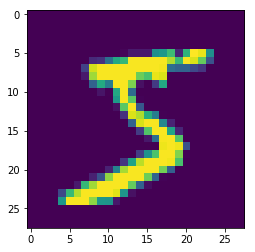

In [7]:
%matplotlib inline
plt.imshow(X_train[0])
plt.show()

Now, we need to reshape our data to explicitly include the channel dimension. In our case, since we have grayscale images, we only have 1 channel. However, if you had an RGB image, then you would have 3 channels.

We just run the below code to specify the channels:

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape)

(60000, 28, 28, 1)


Now, one thing about the MNIST dataset is that the values in the images range form 0 to 255. There's nothing wrong with this, but since these values range pretty high, it may lead to large weights in our neural network. Therefore, we rescale our data to between 0 and 1:

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Now, let's take a look at our labels:

In [10]:
print(y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


As you can see, it is an array of values ranging from 0 to 9. Since we are doing classification, it would be pretty hard to generate the exact number to correspond to the label. Furthermore, since we have numbers for each label, the network may assume some incorrect things - like a relationship between a 5 and a 6, which may not exist in the image data, but does as a comparison between the labels. 

Thus, we will convert our labels to a one-hot encoding - each label will be a 10 entry array, with a 1 in a position to indicate the label. This can easily be done with np_utils, which we imported earlier:

In [11]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Now let's make sure our labels look correct:

In [12]:
print(Y_train.shape)
print(Y_train[0])

(60000, 10)
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


Now we can begin to build our model. We first instantiate a model using the Sequential constructor from Keras

In [13]:
model = Sequential()

Now we need to add our input layer. We need to be careful here, as the input layer needs to correspond to our data.  So we specify the input shape, and the data format.

Another thing you can see is we are adding a `Convolutional2D` layer. Convolution is, to put it simply, moving a window across a (in our case) 2D space, and computing a value using the pixels in that space. You can read more [here](https://en.wikipedia.org/wiki/Convolutional_neural_network).


![alt text][convolution]

[convolution]: https://adeshpande3.github.io/assets/Cover.png "Convolution"


We specify our space with the tuple `(3, 3)`, and the output size as 32. In most Keras layers, we need to specify at least the output size.


Finally, we specify `activation='relu'`. This simply defines the function these neurons will be applying, which is different from the default of linear. Using different functions in these layers allows us to modify the way the network will make its decisions.

In [14]:
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28, 1), data_format="channels_last"))
print(model.output_shape)

(None, 26, 26, 32)


We can continue to add more layers. We do another convolution, and then `MaxPooling2D`. This simply is a way of sampling every 2x2 set of pixels into 1, in order to reduce our width and height. This means we will have less parameters to train for later layers, and provides some prevention against overfitting, since we make decisions based on a less specific part of the image.

We also add a `Dropout` layer. This randomly chooses some neurons from the previous layer to ignore when modifying the weights. This doesn't sound good, but it helps to avoid overfitting by not always training all of the network on the training examples. Read more [here](https://en.wikipedia.org/wiki/Convolutional_neural_network#Dropout).

In [15]:
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

We then flatten the network so that it is a 1D array, to which we connect some `Dense` layers. This means that every part of the previous layer is connected to the next. Notice that the last layer has output specified as 10 - which is the number of classes we are trying to predict.

In [16]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

We can now see the structure of our completed network:

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

You're probably wondering how we decided this structure, and how to do so for other problems. There isn't really any general consensus, except to [add layers until the test error doesn't improve](https://www.quora.com/Artificial-Neural-Networks/Artificial-Neural-Networks-How-can-I-estimate-the-number-of-neurons-and-layers/answer/Yoshua-Bengio?share=7b58dc3b&srid=hqJd)

Finally, we compile our network. We specify the loss and optimizer here. 

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Finally, we can begin training our network. This line will take a decent amount of time.

In [19]:
model.fit(X_train, Y_train, 
          batch_size=128 , epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.2721 - acc: 0.9168
Epoch 2/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0953 - acc: 0.9710
Epoch 3/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0714 - acc: 0.9783
Epoch 4/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0592 - acc: 0.9821
Epoch 5/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0507 - acc: 0.9843
Epoch 6/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0443 - acc: 0.9866
Epoch 7/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0397 - acc: 0.9876
Epoch 8/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0360 - acc: 0.9880
Epoch 9/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0335 - acc: 0.9892
Epoch 10/10
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0300 - a

Now, we can test our network on our test dataset, to determine how well it generalizes.

In [20]:
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

10000/10000 [==============================] - 6s 645us/step
[0.024785956587327747, 0.99129999999999996]


We can test on a random image:

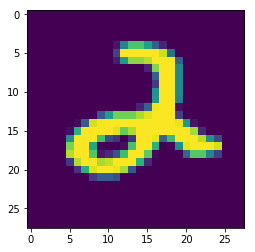

Predicted Label: 2
True Label: 2


In [21]:
# get random location in test data
num = np.random.randint(0, 10000)

# get image and label
img = (X_test[num] * 255).astype('int')
img = img.reshape(img.shape[0], 28)

true_label = Y_test[num].tolist().index(1)


# # show image
plt.imshow(img)
plt.show()

# # predict using model
prediction = model.predict([X_test[num:num+1]])
print("Predicted Label: %d"% prediction.argmax())
print("True Label: %d"% true_label)

You can explore this more using [this visualizer](http://scs.ryerson.ca/~aharley/vis/conv/). It visualizes the LeNet, developed by Yann Lecun, for the MNIST dataset.

Now, we can apply our knowledge to a harder problem: Classifying fruits. We will be using [this](https://github.com/Horea94/Fruit-Images-Dataset) dataset, which contains 28736 train and 9673 test images, in 60 classes. Each image is 100x100 pixels. Extract it to the same directory as this notebook, so we can open it.

In [22]:
from keras.preprocessing.image import img_to_array
import os

train_data = []
train_labels = []
test_data = []
test_labels = []

The next steps will take some time, depending on the speed of your computer. If you want, you can import the following library, which is a wrapper for iterators that will print the progress of the iterations. You may need to `pip install tqdm`.

In [23]:
# from tqdm import tqdm

We need to open our training dataset, resize it, and get the corresponding label. We resize it to simplify our training significantly, albeit at the cost of some accuracy.

In [24]:
imagePaths = sorted(list(paths.list_images("fruits-360/Training")))
np.random.shuffle(imagePaths)

# for imagePath in tqdm(imagePaths):
for imagePath in imagePaths:
#     Some folder names have spaces, which are escaped with a backslash
#     We need to remove them so that we can open them
    imagePath = imagePath.replace("\\", "")
#     Open the image
    image = cv2.imread(imagePath)
#     resize
    image = cv2.resize(image, (45, 45))
#     get array, and append
    image = img_to_array(image)
    train_data.append(image)
#     The labels are simply the containing folder name
    label = imagePath.split(os.path.sep)[-2]
    train_labels.append(label)

We can see one of the opened images using `matplotlib`:

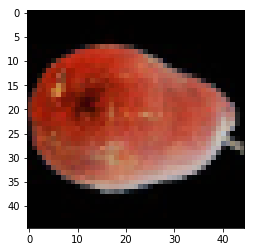

Pear Monster


In [25]:
plt.imshow(train_data[0])
plt.show()
print(train_labels[0])

Again, we need to convert our data to floats, to prevent large weights:

In [26]:
# explicitly convert to np arrays, since data not preprocessed like MNIST
train_data = np.array(train_data, dtype=np.float32) / 255.0
train_labels = np.array(train_labels)

We also import the test data:

In [27]:
imagePaths2 = sorted(list(paths.list_images("fruits-360/Validation")))
np.random.shuffle(imagePaths2)

# for imagePath in tqdm(imagePaths2):
for imagePath in imagePaths2:
    imagePath = imagePath.replace("\\", "")
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (45, 45))
    image = img_to_array(image)
    test_data.append(image)
 
    label = imagePath.split(os.path.sep)[-2]
    test_labels.append(label)
    
test_data = np.array(test_data, dtype=np.float32) / 255.0
test_labels = np.array(test_labels)


Now, since our labels are strings, and not numbers, we cannot use the same np_utils function exactly as before. First, we use LabelEncoder from scikit-learn, to convert our strings to integers, using which we can convert to one-hot encodings:

In [28]:

encoder = LabelEncoder()
encoder.fit(train_labels)
encoded_train = encoder.transform(train_labels)
train_labels = np_utils.to_categorical(encoded_train)

encoder = LabelEncoder()
encoder.fit(test_labels)
encoded_test = encoder.transform(test_labels)
test_labels = np_utils.to_categorical(encoded_test)

We can see our number of train and test examples, which should be 28736, and 9673, respectively:

In [29]:
no_train_samples = np.shape(train_data)[0]
no_test_samples = np.shape(test_data)[0]
print(no_train_samples, no_test_samples)

28736 9673


Note that we have just read in our dataset entirely into memory. In many cases, this may not be possible, in which case you may want to use something that reads data sequentially as it is trained, such as the Keras [flow_from_directory](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html).

Now we can create our neural network, and train it:

In [30]:
fruit_model = Sequential()
fruit_model.add(Convolution2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(45, 45, 3)))
fruit_model.add(Convolution2D(64, (3, 3), activation='relu'))
fruit_model.add(MaxPooling2D(pool_size=(2, 2)))
fruit_model.add(Dropout(0.25))
fruit_model.add(Flatten())
fruit_model.add(Dense(128, activation='relu'))
fruit_model.add(Dropout(0.5))
fruit_model.add(Dense(60, activation='softmax'))

fruit_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

fruit_model.fit(train_data, train_labels,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(test_data, test_labels))
score = fruit_model.evaluate(test_data, test_labels, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 28736 samples, validate on 9673 samples
Epoch 1/5
28736/28736 [==============================] - 214s 7ms/step - loss: 1.5587 - acc: 0.5758 - val_loss: 0.3180 - val_acc: 0.9036
Epoch 2/5
28736/28736 [==============================] - 237s 8ms/step - loss: 0.2950 - acc: 0.9046 - val_loss: 0.1646 - val_acc: 0.9457
Epoch 3/5
28736/28736 [==============================] - 217s 8ms/step - loss: 0.1612 - acc: 0.9463 - val_loss: 0.1578 - val_acc: 0.9525
Epoch 4/5
28736/28736 [==============================] - 215s 7ms/step - loss: 0.1221 - acc: 0.9588 - val_loss: 0.1707 - val_acc: 0.9553
Epoch 5/5
9673/9673 [==============================] - 21s 2ms/step
Test loss: 0.132134125281
Test accuracy: 0.958647782487


As you can see, we get pretty high accuracy over both the train and test data, meaning we have made a good classifier, without too much overfitting. Once you've trained your model, you can save it for later, for further predictions, or further training:

In [31]:
model.save('MNIST_model.h5')
fruit_model.save('fruit_model.h5')

### References

For more information, feel free to consult these links:

1. Keras: https://keras.io/
2. TensorFlow: https://www.tensorflow.org/
3. Keras Examples: https://keras.io/getting-started/sequential-model-guide/#examples
